In [1]:
#imports
import pandas as pd
import json
import numpy as np
import os
from scipy.stats import sem
import matplotlib .pyplot as plt
%matplotlib inline

In [2]:
#load data
df=pd.read_csv("data.csv")

In [127]:
df

,Unnamed: 0,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,DISTANCE
0,0,2013-01-01,Virgin America,LAX,IAD,700,700.0,0.0,1445,1418.0,-27.0,2288.0
1,1,2013-01-01,Virgin America,LAX,IAD,2205,2204.0,-1.0,545,536.0,-9.0,2288.0
2,2,2013-01-01,Virgin America,JFK,SFO,730,729.0,-1.0,1115,1049.0,-26.0,2586.0
3,3,2013-01-01,Virgin America,PHL,LAX,700,700.0,0.0,1000,1014.0,14.0,2402.0
4,4,2013-01-01,Virgin America,LAX,PHL,1100,1104.0,4.0,1915,1837.0,-38.0,2402.0
...,...,...,...,...,...,...,...,...,...,...,...,...
35841064,7213441,2018-12-31,American Airlines,DCA,CLT,1534,1530.0,-4.0,1714,1709.0,-5.0,331.0
35841065,7213442,2018-12-31,American Airlines,CLT,DFW,1751,1757.0,6.0,1952,1953.0,1.0,936.0
35841066,7213443,2018-12-31,American Airlines,CLT,MEM,2015,2010.0,-5.0,2107,2118.0,11.0,511.0
35841067,7213444,2018-12-31,American Airlines,CLT,RDU,1300,1323.0,23.0,1350,1404.0,14.0,130.0


In [3]:
#change the variable to datetime and set only the month 
pd.to_datetime(df.FL_DATE)
df['FL_DATE_month'] = pd.to_datetime(df['FL_DATE']).dt.month
df['FL_DATE_month']

0            1
1            1
2            1
3            1
4            1
            ..
35841064    12
35841065    12
35841066    12
35841067    12
35841068    12
Name: FL_DATE_month, Length: 35841069, dtype: int64

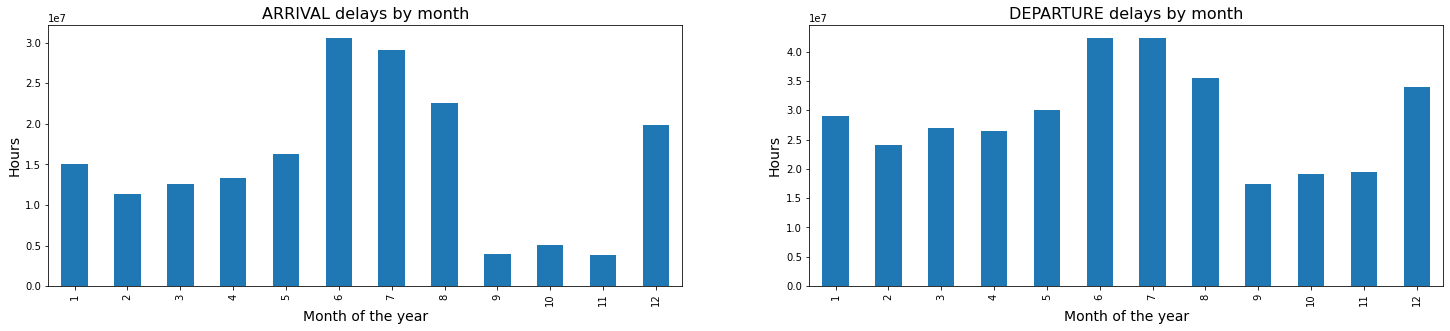

In [129]:
# Arrival and departure delays by month of the year
plt.figure(figsize=(25, 12)).subplots_adjust(hspace = 0.5)

plt.subplot(2, 2 ,1)
df.groupby('FL_DATE_month').ARR_DELAY.sum().plot.bar().set_title('ARRIVAL delays by month')
plt.title('ARRIVAL delays by month', fontsize=16)
plt.ylabel('Hours', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)

plt.subplot(2, 2 ,2)
df.groupby('FL_DATE_month').DEP_DELAY.sum().plot.bar()
plt.title('DEPARTURE delays by month', fontsize=16)
plt.ylabel('Hours', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)

plt.show()

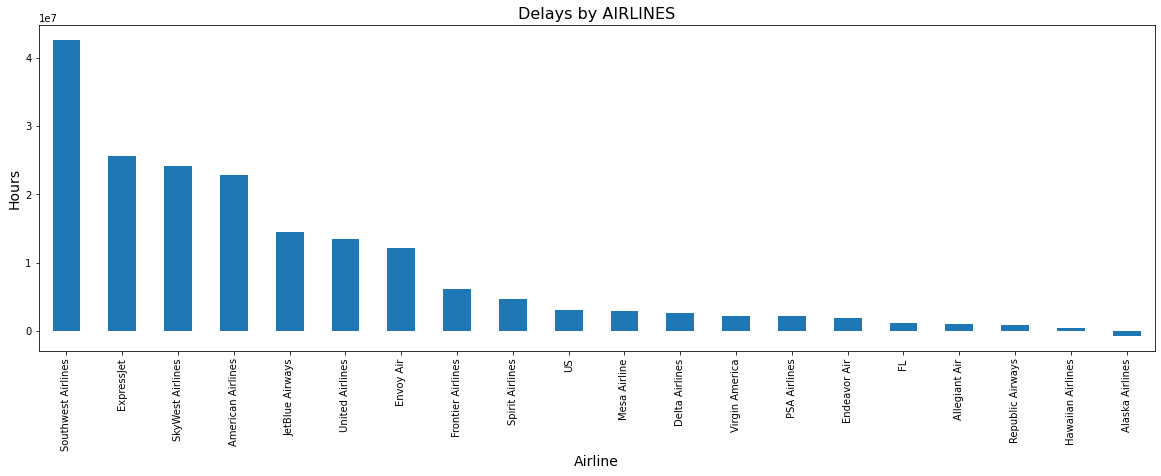

In [130]:
# Delays by airlines
plt.figure(figsize=(20, 6))
df.groupby('OP_CARRIER').ARR_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('Delays by AIRLINES', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Hours', fontsize=14)
plt.show()

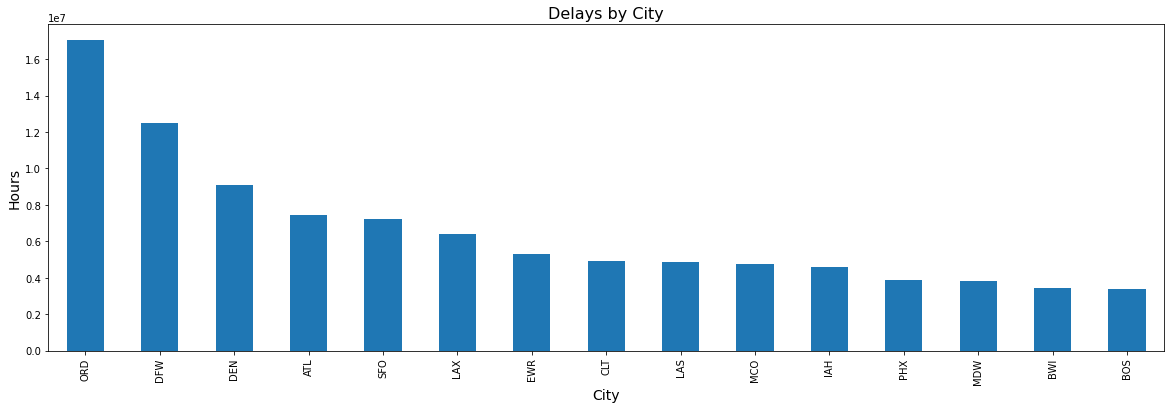

In [131]:
# Delays by City
city_by_delay = df.groupby('ORIGIN').ARR_DELAY.sum().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
city_by_delay[:15].plot.bar()
plt.title('Delays by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Hours', fontsize=14)
plt.show()

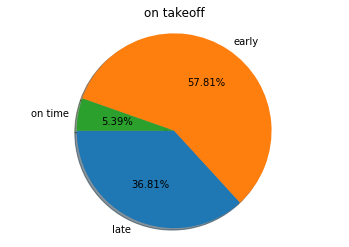

In [132]:
#pie graph on delay takeoff
df_early = df[df['DEP_DELAY']<0].reset_index(drop=True)
df_late = df[(df['DEP_DELAY']>0)].reset_index(drop=True)
df_onTime = df[(df['DEP_DELAY']==0)].reset_index(drop=True)
sizes = [len(df_late)/len(df)*100,len(df_early)/len(df)*100,len(df_onTime)/len(df)*100]
labels = [ 'late','early','on time']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',shadow=True, startangle=180)
ax1.axis('equal')  
plt.title('on takeoff')
plt.show()

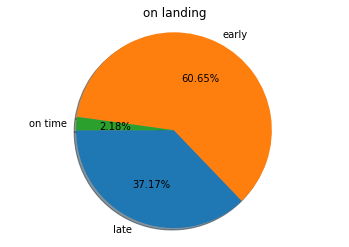

In [133]:
###pie graph on delay landing
df_early = df[df['ARR_DELAY']<0].reset_index(drop=True)
df_late = df[(df['ARR_DELAY']>0)].reset_index(drop=True)
df_onTime = df[(df['ARR_DELAY']==0)].reset_index(drop=True)
sizes = [len(df_late)/len(df)*100,len(df_early)/len(df)*100,len(df_onTime)/len(df)*100]
labels = [ 'late', 'early','on time']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',shadow=True, startangle=180)
ax1.axis('equal')  
plt.title('on landing')
plt.show()

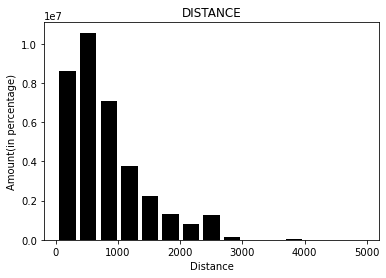

In [134]:
df.DISTANCE.hist(bins=15, grid = False, rwidth=0.8, color ='black')
plt.xlabel('Distance')
plt.ylabel('Amount(in percentage)')
plt.title('DISTANCE')
plt.show()

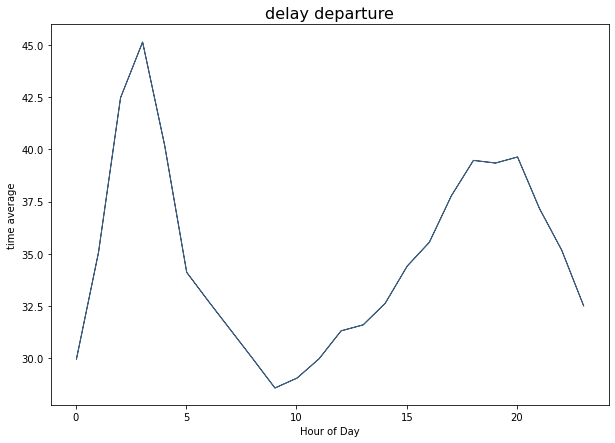

In [14]:
new = df[['CRS_DEP_TIME']].copy()
new['DEP_DELAY']=df['DEP_DELAY'].copy()
new = new.dropna(axis=0)
new=new[new['DEP_DELAY']>0]
new['CRS_DEP_TIME'] = df['CRS_DEP_TIME'] / 100
new['CRS_DEP_TIME']=new['CRS_DEP_TIME'].astype('int')

df_mean = new.groupby('CRS_DEP_TIME').DEP_DELAY.mean()

plt.figure(figsize=(10,7))
plt.ylabel("time average")  
x = df_mean.index
plt.fill_between(x, df_mean , df_mean, color="#3F5D7D")  

plt.title("delay departure", fontsize=16)
plt.xlabel("Hour of Day")

plt.show()

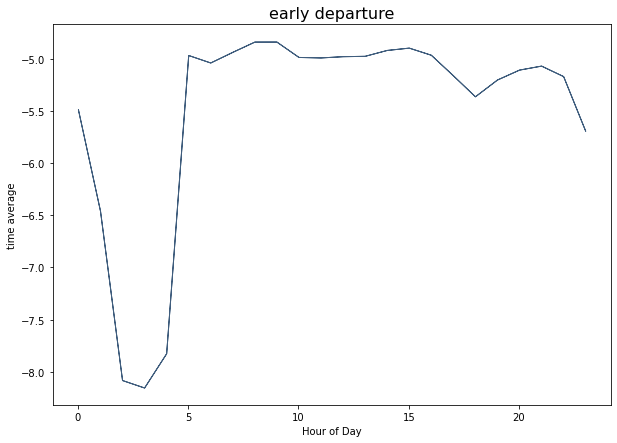

In [13]:
new = df[['CRS_DEP_TIME']].copy()
new['DEP_DELAY']=df['DEP_DELAY'].copy()
new = new.dropna(axis=0)
new=new[new['DEP_DELAY']<0]
new['CRS_DEP_TIME'] = new['CRS_DEP_TIME'] / 100
new['CRS_DEP_TIME']=new['CRS_DEP_TIME'].astype('int')

#make visual
df_mean = new.groupby('CRS_DEP_TIME').DEP_DELAY.mean()

plt.figure(figsize=(10,7))
plt.ylabel("time average")  
x = df_mean.index
plt.fill_between(x, df_mean, df_mean, color="#3F5D7D")  

plt.title("early departure", fontsize=16)
plt.xlabel("Hour of Day")

plt.show()